## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

# EDA: Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [7]:
df = pd.read_csv('../lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [9]:
df.isnull().sum().sort_values(ascending = False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
address                     0
verification_status         0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
purpose                     0
issue_d                     0
loan_status                 0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
initial_list_status         0
application_type            0
loan_amnt                   0
dtype: int64

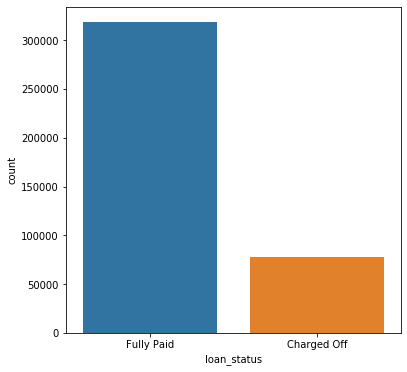

In [10]:
plt.figure(figsize=(6,6))
sns.countplot('loan_status' , data = df)

In [11]:
df['loan_status'].value_counts()/len(df)

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

Data is unbalanced. More than 80% values belong to one category which might create problem while building the model. 

**TASK: Create a histogram of the loan_amnt column.**

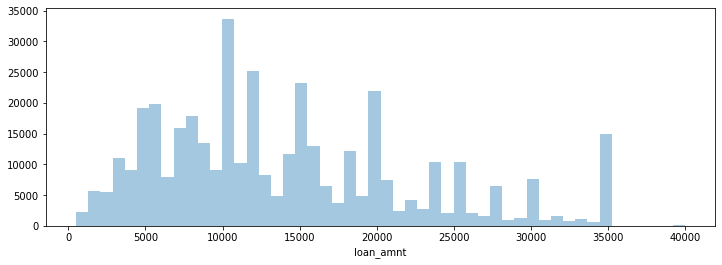

In [12]:
plt.figure(figsize=(12, 4))
sns.distplot(df['loan_amnt'], kde=False)

### Exploring correlation between the continuous feature variables. Calculate the correlation between all continuous numeric

In [13]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


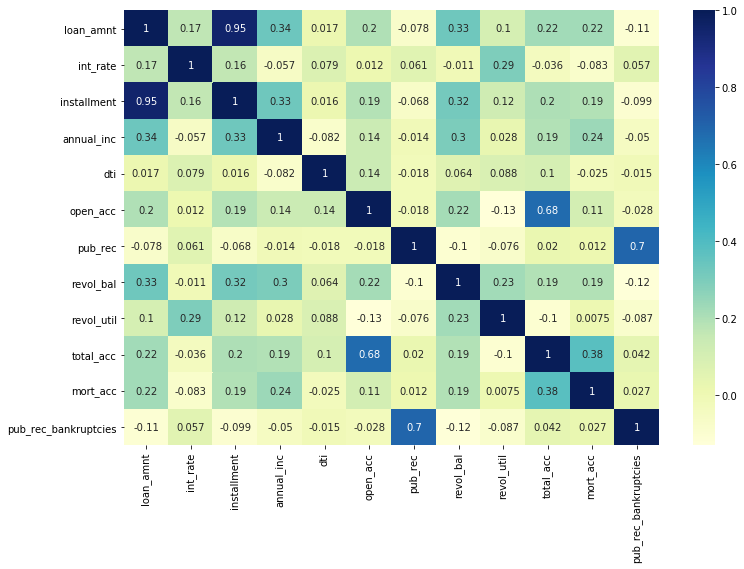

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [15]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [16]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


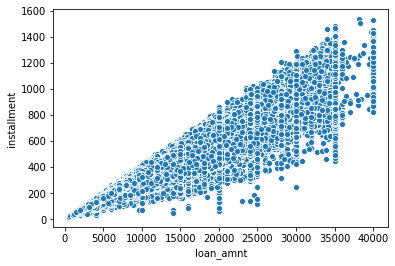

In [17]:
sns.scatterplot(x = 'loan_amnt', y = 'installment', data = df)
#df[['loan_amnt', 'installment']]

We can see that there are varying installment amounts for same loan amount. This might be dependent upon the interast charged, duration, borrower's profile which usually be the case. 

Lets' look at the variation happening at the loan status level it might be possible that charging off might be induced by higher installment values 

[Investopedia: varied interest rate](https://www.investopedia.com/articles/investing/080713/how-banks-set-interest-rates-your-loans.asp)

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

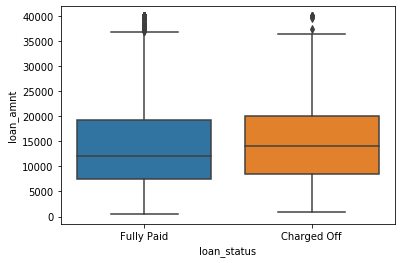

In [18]:
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)

Mean value of loan amount which company had to charged off is higher than the paid amounts. Which also makes sense intuitively. 
Further, installment might have also led to similar thing given that loan amount is highly correlated with installments 

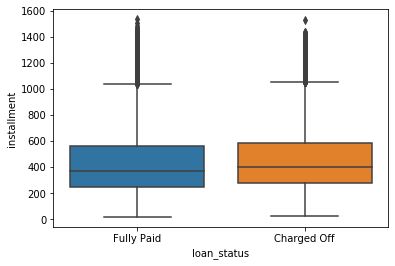

In [19]:
sns.boxplot(x = 'loan_status', y = 'installment', data = df)

**Summary statistics for the loan amount, grouped by the loan_status.**

In [20]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Exploring the Grade and SubGrade columns that LendingClub attributes to the loans.**

In [21]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [22]:
feat_info('grade')

LC assigned loan grade


In [23]:
feat_info('sub_grade')

LC assigned loan subgrade


In [24]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [25]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [26]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [27]:
df['sub_grade'].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

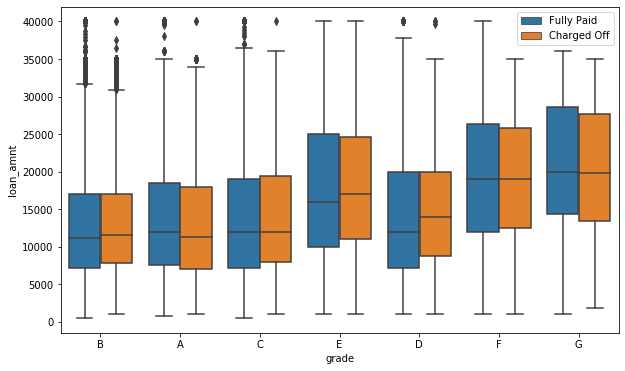

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'grade', y = 'loan_amnt', hue = 'loan_status', data = df)
plt.legend(loc = 'upper right')

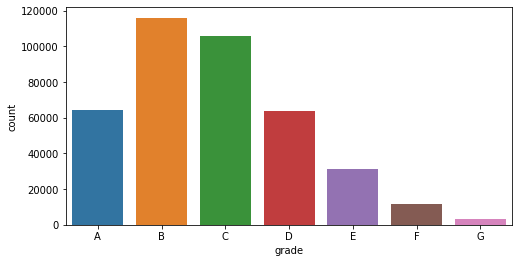

In [29]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'grade',  data = df.sort_values('grade'))

Mostly, B and C category loans are sold to the customers in terms of count.  

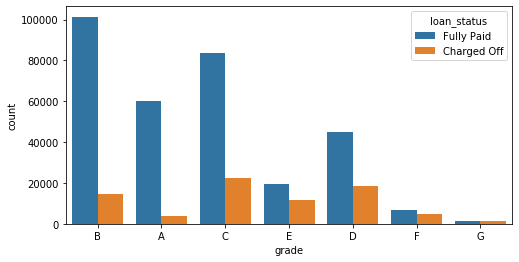

In [30]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'grade', hue = 'loan_status', data = df)

In [31]:
df.groupby(['grade', 'loan_status'])['grade'].count()

grade  loan_status
A      Charged Off      4036
       Fully Paid      60151
B      Charged Off     14587
       Fully Paid     101431
C      Charged Off     22449
       Fully Paid      83538
D      Charged Off     18338
       Fully Paid      45186
E      Charged Off     11765
       Fully Paid      19723
F      Charged Off      5037
       Fully Paid       6735
G      Charged Off      1461
       Fully Paid       1593
Name: grade, dtype: int64

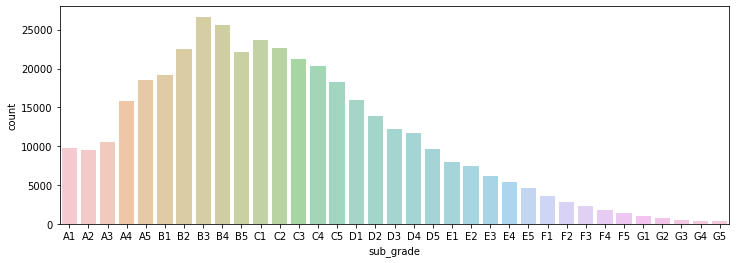

In [32]:
plt.figure(figsize=(12,4))
sns.countplot(x = 'sub_grade', data = df.sort_values('sub_grade'),alpha = .5)

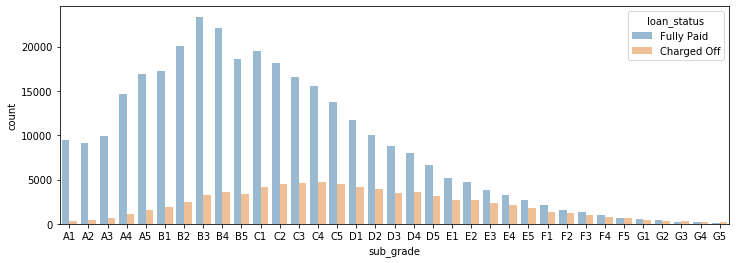

In [33]:
plt.figure(figsize=(12,4))
sns.countplot(x = 'sub_grade', data = df.sort_values('sub_grade'), hue = 'loan_status', alpha = .5)

As we can see that Category F & G has quite close Fully paid and charged off count. We would be exploring the reason for that. 

In [34]:
#df.groupby(['sub_grade', 'loan_status'])['loan_status'].count()

In [35]:
df[['grade', 'sub_grade']].drop_duplicates().sort_values('grade')

,grade,sub_grade
3,A,A2
19,A,A3
6,A,A1
15,A,A5
18,A,A4
0,B,B4
1,B,B5
2,B,B3
7,B,B2
28,B,B1


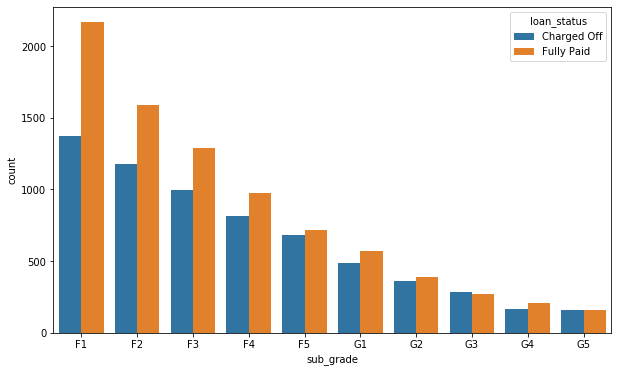

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'sub_grade', hue = 'loan_status' , data = df[df['grade'].isin(['F', 'G'])].sort_values('sub_grade'))

#### Creating Response variable's column 

In [37]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [38]:
df['loan_repaid'] = df['loan_status'].apply(lambda status: 1 if status == 'Fully Paid' else 0) 

In [39]:
df['loan_repaid'].value_counts()

1    318357
0     77673
Name: loan_repaid, dtype: int64

In [40]:
df[['loan_repaid', 'loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


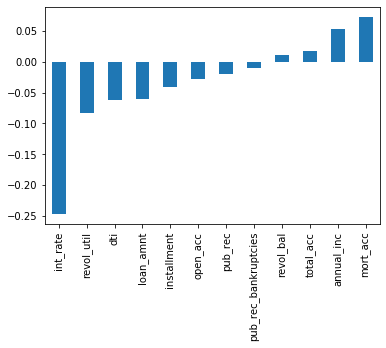

In [41]:
### creating correlation 
df.corr()['loan_repaid'].sort_values(ascending = True).drop('loan_repaid', axis = 0).plot(kind = 'bar', figsize = (6,4))

In [42]:
feat_info('mort_acc')

Number of mortgage accounts.


### There are following variables which seems to have high correlation with the dependent variable:
Max correlation that we are observing here is 25% that is quuite low. 

**Week Correlation**

* interest rate (-ve)
* revolution utilization (-ve)
* number of mortgage accounts (+ve)

---
---
# Data PreProcessing


* Removing or filling missing data. 
* Removing unnecessary or repetitive features. 
* Converting categorical string features to dummy variables



In [43]:
df.isnull().sum().sort_values(ascending = False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
loan_repaid                 0
issue_d                     0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
purpose                     0
loan_status                 0
address                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
initial_list_status         0
application_type            0
loan_amnt                   0
dtype: int64

In [44]:
df.head().iloc[0].T

loan_amnt                                                      10000
term                                                       36 months
int_rate                                                       11.44
installment                                                   329.48
grade                                                              B
sub_grade                                                         B4
emp_title                                                  Marketing
emp_length                                                 10+ years
home_ownership                                                  RENT
annual_inc                                                    117000
verification_status                                     Not Verified
issue_d                                                     Jan-2015
loan_status                                               Fully Paid
purpose                                                     vacation
title                             

In [45]:
### Convert categorical variables to dummy variables 
#pd.get_dummies(pd.Series(['Anshul', 'Rahul', 'Anshul', 'Rahul']))

#df['term'].unique()
# df = pd.concat([df, pd.get_dummies(df['term']),  ## term
#                 pd.get_dummies(df['emp_title']),  ## emp_title
#                 pd.get_dummies(df['term'])], axis = 1)

In [46]:
df['emp_title'].isnull().sum()

22927

In [47]:
df.dtypes.sort_values(ascending = False)

purpose                  object
emp_length               object
issue_d                  object
loan_status              object
address                  object
title                    object
home_ownership           object
earliest_cr_line         object
emp_title                object
sub_grade                object
grade                    object
initial_list_status      object
application_type         object
term                     object
verification_status      object
annual_inc              float64
installment             float64
int_rate                float64
loan_amnt               float64
dti                     float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
mort_acc                float64
pub_rec_bankruptcies    float64
loan_repaid               int64
dtype: object

# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [48]:
100*df.isnull().sum().sort_values(ascending = False)/len(df)

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
loan_repaid             0.000000
issue_d                 0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
purpose                 0.000000
loan_status             0.000000
address                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
loan_amnt               0.000000
dtype: float64

In [49]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [50]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [51]:
df['emp_title'].value_counts()

Teacher                      4389
Manager                      4250
Registered Nurse             1856
RN                           1846
Supervisor                   1830
                             ... 
stoughton trucking              1
Public Library of Science       1
Stores Specialist Sr            1
Engineering manager             1
Jerry's Club Party Store        1
Name: emp_title, Length: 173105, dtype: int64

Too many jonb titles, as of now we can removee it. Further, we can change our decision once we test accuarcy 

#### Employment Length

In [52]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


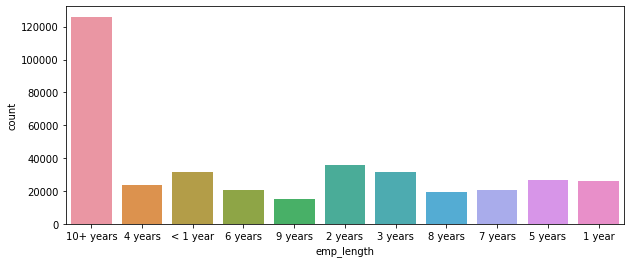

In [53]:
plt.figure(figsize=(10,4))
sns.countplot(df['emp_length'])

#### Hypothesses:
Loan amount should highly depends on number of years in the service 

In [54]:
df.groupby('emp_length')['loan_amnt'].mean().sort_values(ascending= False)

emp_length
10+ years    15359.641506
9 years      14573.785425
8 years      14488.587750
7 years      14285.353523
6 years      13918.507989
5 years      13731.755992
4 years      13665.178273
3 years      13559.805779
2 years      13453.189634
< 1 year     13169.615445
1 year       13146.597056
Name: loan_amnt, dtype: float64

mean is definitely higher for more number of years in the service 

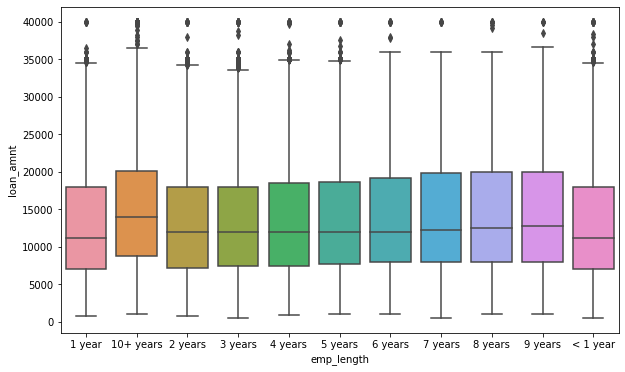

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'emp_length', y = 'loan_amnt', data = df.sort_values('emp_length'))

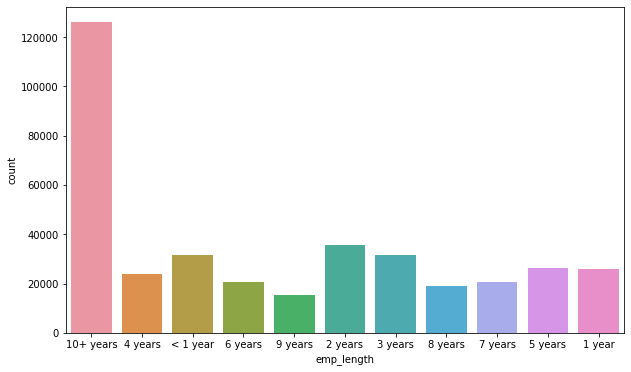

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(df['emp_length'])

Lets' look at the number of employment year's influence on paying off behaviour

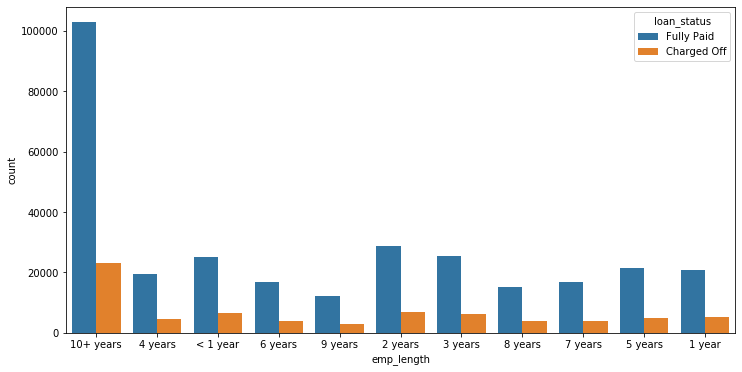

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'emp_length', data = df, hue = 'loan_status')

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

In [58]:
loan_status_emp_length = df.groupby(['emp_length', 'loan_status'])['loan_status'].count().to_frame()
loan_status_emp_length.columns = ['loan_status_count']
loan_status_emp_length.reset_index(inplace = True)

In [59]:
loan_status_emp_length['sum_count'] = loan_status_emp_length.groupby('emp_length')['loan_status_count'].transform('sum')
loan_status_emp_length['per_charge_off'] = loan_status_emp_length['loan_status_count']*100/loan_status_emp_length['sum_count']

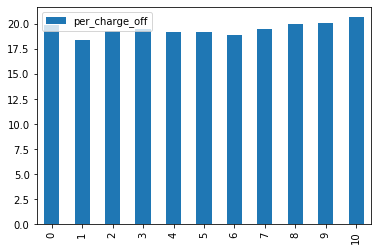

In [60]:
loan_status_emp_length.set_index('loan_status').loc['Charged Off'].reset_index()[['emp_length', 'per_charge_off']].plot(kind= "bar")
plt.show()

**Relative volumne of Charging off w.r.t Fully paid customers**

In [61]:
paid = df[df['loan_status'] == 'Fully Paid'].groupby(['emp_length'])['emp_length'].count()

In [62]:
chargeOff =df[df['loan_status'] == 'Charged Off'].groupby(['emp_length'])['emp_length'].count()

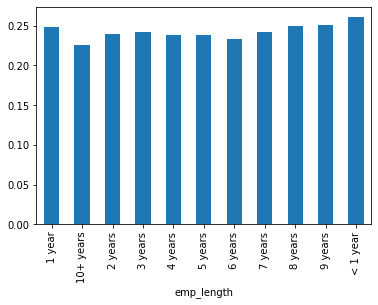

In [63]:
(chargeOff/paid).plot(kind = 'bar')

### Removing employment title and employment length:

* **employment title**: it has too many professions, so converting them to dummies won't make sense 
* **employment length**: loan status distributions is quite similar across multiple profiles 

In [64]:
# dropping above two columns 
df.drop(['emp_title', 'emp_length'], axis = 1, inplace = True)

In [65]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [66]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [67]:
df['title'].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [68]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [69]:
df['title'].value_counts()

Debt consolidation                   152472
Credit card refinancing               51487
Home improvement                      15264
Other                                 12930
Debt Consolidation                    11608
                                      ...  
Depot                                     1
Help Paying off Credit Card Debt!         1
cc consolidation loan                     1
Interest Reduction                        1
LIVING AMELIORATION                       1
Name: title, Length: 48817, dtype: int64

In [70]:
df['purpose'].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [71]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [72]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

-----
We can remove one of the above mentioned columns: It seems like **title column** is a decription of **purpose** column which is more crisp

In [73]:
df.drop('title', axis=1, inplace= True)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [74]:
df.isnull().sum()['mort_acc']/len(df) ## 10 % missing values 

0.09543468929121532

In [75]:
feat_info('mort_acc')

Number of mortgage accounts.


In [76]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

### Various ways to deal with missing values in a continuous variable

- fit a simple model to fill the  missing information
- use mean based on other columns 
- bin the category and set NaN as a separate category 

#### Generating correlation with other features

In [77]:
df.corr()['mort_acc'].sort_values(ascending= False).drop('mort_acc')

total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [78]:
print('Mean of mort_acc column per total_acc')
df.groupby(['total_acc'])['mort_acc'].mean()

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

#### Filling missing *mort_acc* values with highest correlated variable(total_acc) 

In [79]:
dict_totAcc_mortAcc = df.groupby(['total_acc'])['mort_acc'].mean().to_dict()

In [80]:
df['mort_acc'] = df[['total_acc', 'mort_acc']].apply(lambda x : x[1] if pd.notnull(x[1]) else dict_totAcc_mortAcc[x[0]], axis = 1)

In [81]:
df.isnull().sum().sort_values(ascending= False)/len(df)

pub_rec_bankruptcies    0.001351
revol_util              0.000697
loan_repaid             0.000000
loan_status             0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
dti                     0.000000
purpose                 0.000000
address                 0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
loan_amnt               0.000000
dtype: float64

#### Following missing values in the corresponding variable contain only less that 1% missing 
    We can safely remove these missing values 
    
    Variable               % missing 
    ====================================
    pub_rec_bankruptcies    0.1351
    revol_util              0.0697
    ====================================

In [82]:
print('shape before removing missing values: ' + str(df.shape))
df.dropna(axis=0, inplace =True)
print('shape after removing missing values: ' + str(df.shape))

shape before removing missing values: (396030, 25)
shape after removing missing values: (395219, 25)


In [83]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

In [84]:
df.dtypes.sort_values()

loan_repaid               int64
pub_rec_bankruptcies    float64
mort_acc                float64
total_acc               float64
revol_util              float64
revol_bal               float64
pub_rec                 float64
open_acc                float64
loan_amnt               float64
annual_inc              float64
installment             float64
int_rate                float64
dti                     float64
issue_d                  object
loan_status              object
purpose                  object
address                  object
earliest_cr_line         object
home_ownership           object
sub_grade                object
grade                    object
initial_list_status      object
application_type         object
term                     object
verification_status      object
dtype: object

In [85]:
list(df.select_dtypes(['object']).columns)

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

---------
### term feature

Converting **term** feature into dummy variable and further dropping one of the level to avoid dummy variable trap

In [86]:
df = pd.concat([df, pd.get_dummies(df['term'])], axis = 1)

In [87]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,36 months,60 months
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,1,0
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,1,0
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,1,0
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,1,0
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,1


In [88]:
df = df.drop(['term', ' 60 months'], axis = 1) 

In [89]:
list(df.select_dtypes('object').columns)

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

### grade feature

We already know grade is part of sub_grade, so just drop the grade feature.**

In [90]:
df.drop('grade', axis = 1, inplace = True)

### sub_grade feature

drop_first = True : will drop the first level of during dummy conversion

In [91]:
df = pd.concat([df, pd.get_dummies(df['sub_grade'], drop_first=True)], axis = 1)

In [92]:
df = df.drop('sub_grade', axis = 1)

In [93]:
list(df.select_dtypes('object').columns)

['home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

### verification_status, application_type,initial_list_status,purpose 

In [94]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', ' 36 months', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [95]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

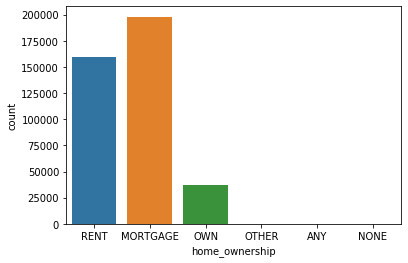

In [96]:
sns.countplot(df['home_ownership'])

In [97]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

### home_converting

    converting to Other, none and any to one category

In [98]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if x in ['NONE', 'ANY'] else x)

In [111]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [100]:
list(df.select_dtypes('object').columns)

['home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [121]:
feat_info('issue_d')

The month which the loan was funded


In [122]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


**We need to check these variables later on:**
    
    issue_d
    
We have found that there are tooo many levels for these variables which prevents us from  converting these variables to dummy variables 

In [124]:
feat_info('initial_list_status')

The initial listing status of the loan. Possible values are – W, F


In [123]:
df['initial_list_status'].value_counts()

# plt.figure(figsize=(12,6))
# sns.countplot(df['purpose'])
# plt.tight_layout()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [112]:
#plt.figure(figsize=(10, 6))
#sns.countplot(df['issue_d'])

#plt.tight_layout()
# sns.barplot(df['issue_d'])

**Converting following list of variables to dummy variables**

In [126]:
convert2Dummy = ['home_ownership', 'verification_status' ,'purpose', 'initial_list_status', 'application_type']

In [127]:
df = pd.concat([df, pd.get_dummies(df[convert2Dummy], drop_first=True)], axis = 1)

In [129]:
df.drop(convert2Dummy, axis = 1, inplace=True)

In [130]:
df.head()

,loan_amnt,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1,8000.0,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,15600.0,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,7200.0,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,24375.0,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [131]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', ' 36 months', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_stat

### address
**Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [148]:
df['zip_code'] = df['address'].apply(lambda x: int(x.split()[-1]))

**Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [149]:
df = pd.concat([df, pd.get_dummies(df['zip_code'], drop_first=True)], axis = 1).drop('zip_code', axis = 1)

In [151]:
df.drop('address', axis = 1, inplace = True)
df.head()

,loan_amnt,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,application_type_JOINT,5113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,0.0,...,0,0,1,0,0,0,0,0,0,0


### earliest_cr_line
    
    extracting year value from the column 

In [152]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [156]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: x.split('-')[1])

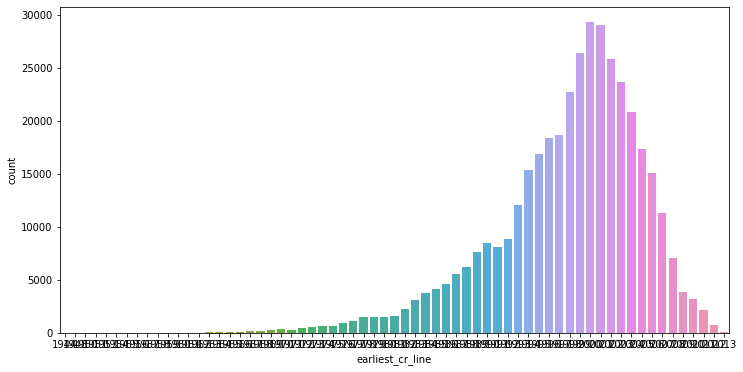

In [160]:
plt.figure(figsize=(12,6))
sns.countplot(df['earliest_cr_line'])

In [163]:
df = pd.concat([df, pd.get_dummies(df['earliest_cr_line'], drop_first=True)], axis = 1)
df.drop('earliest_cr_line', axis = 1, inplace= True)

In [165]:
list(df.select_dtypes('object').columns)

['issue_d', 'loan_status']

In [166]:
df.drop(['issue_d', 'loan_status'], axis = 1, inplace = True)

## Train Test Split

In [167]:
from sklearn.model_selection import train_test_split

We'll use the loan_repaid column since its already in 0s and 1s.

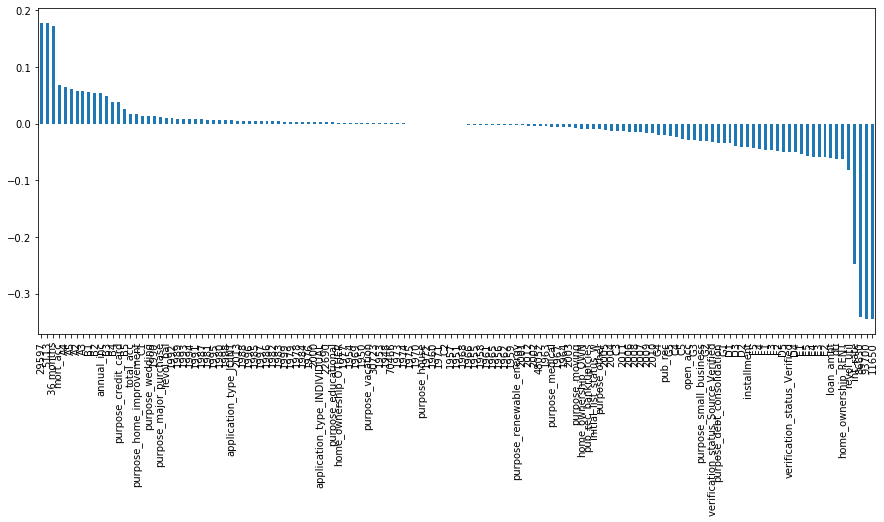

In [173]:
df.corr()['loan_repaid'].sort_values(ascending = False).drop('loan_repaid').plot(kind = 'bar', figsize = (15, 6))

### Using Neural Network to predict loan repayment ability of the customers 

In [174]:
X = df.drop('loan_repaid', axis = 1).values
y = df['loan_repaid'].values

In [176]:
X.shape

(395219, 141)

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
# sns.countplot(y_train)

In [216]:
# sns.countplot(y_test)

----
----

OPTIONAL

Grabbing a Sample for Training Time

OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [ ]:
# df = df.sample(frac=0.1,random_state=101)
# print(len(df))

## Normalizing the Data


In [217]:
from sklearn.preprocessing import MinMaxScaler

In [218]:
scaler = MinMaxScaler()

In [219]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [220]:
print(X_train.min())
print(X_train.max())

0.0
1.0


In [221]:
print(X_test.min())
print(X_test.max())

-0.005728835136855507
1.0067567567567568


# Creating the Model

In [222]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [223]:
X_train.shape[1:]

(141,)

In [224]:
# CODE HERE
model = Sequential()

# Choose whatever number of layers/neurons you want.

model.add(Flatten(input_shape = X_train.shape[1:])) ## input layer 

## hidden layers
model.add(Dense(78, activation='relu'))
model.add(Dropout(rate = 0.25))

model.add(Dense(39, activation='relu'))
model.add(Dropout(rate = 0.25))

model.add(Dense(19, activation='relu'))
model.add(Dropout(rate = 0.25))

model.add(Dense(1, activation='sigmoid'))

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()
model.compile(loss='binary_crossentropy', optimizer='adam')

### Fitting the model

In [226]:
model.fit(x = X_train, 
          y=y_train, 
          validation_data=(X_test, y_test), 
          batch_size=256, 
          epochs=40)

Train on 316175 samples, validate on 79044 samples
Epoch 1/40
316175/316175 [==============================] - 9s 28us/step - loss: 0.3112 - val_loss: 0.2635
Epoch 2/40
316175/316175 [==============================] - 8s 26us/step - loss: 0.2694 - val_loss: 0.2611
Epoch 3/40
316175/316175 [==============================] - 8s 24us/step - loss: 0.2649 - val_loss: 0.2603
Epoch 4/40
316175/316175 [==============================] - 7s 23us/step - loss: 0.2627 - val_loss: 0.2600
Epoch 5/40
316175/316175 [==============================] - 8s 24us/step - loss: 0.2618 - val_loss: 0.2601
Epoch 6/40
316175/316175 [==============================] - 8s 25us/step - loss: 0.2613 - val_loss: 0.2598
Epoch 7/40
316175/316175 [==============================] - 8s 24us/step - loss: 0.2605 - val_loss: 0.2594
Epoch 8/40
316175/316175 [==============================] - 8s 25us/step - loss: 0.2599 - val_loss: 0.2600
Epoch 9/40
316175/316175 [==============================] - 8s 25us/step - loss: 0.2597 - val

### Evaluating model - Training loss vs Validation loss

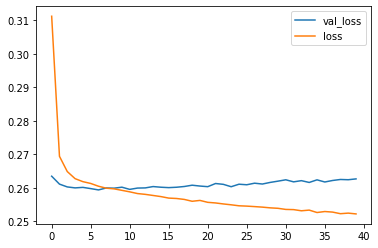

In [227]:
pd.DataFrame(model.history.history).plot()

 **Saving the model.**

In [228]:
from tensorflow.keras.models import save_model, load_model

In [230]:
save_model(model, '../ANNs/lending_model_v1.h5')

In [231]:
model = load_model('../ANNs/lending_model_v1.h5')

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [232]:
from sklearn.metrics import classification_report, confusion_matrix

In [233]:
preds = model.predict_classes(X_test)

In [235]:
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.46      0.62     15421
           1       0.88      0.99      0.93     63623

    accuracy                           0.89     79044
   macro avg       0.90      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044

[[ 7164  8257]
 [  622 63001]]


**Given the customer below, would you offer this person a loan?**

In [247]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
dti               30.11
                 ...   
2009               0.00
2010               0.00
2011               0.00
2012               0.00
2013               0.00
Name: 305323, Length: 141, dtype: float64

In [248]:
#print(new_customer.shape)
# new_customer = new_customer.values.reshape(-1)
new_customer = new_customer.values

In [251]:
model.predict_classes(new_customer.reshape(1,141))

array([[1]])

**TASK: Now check, did this person actually end up paying back their loan?**

In [252]:
df['loan_repaid'].iloc[random_ind]

1

# Thank  You :)